In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix
from qiskit_aer.quantum_info import AerDensityMatrix
from qiskit.circuit.library import QuantumVolume

## 1 quibit circuits

In [3]:
qc = QuantumVolume(1, seed=1111)
%timeit -o DensityMatrix(qc)

136 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 136 µs ± 1.02 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

In [4]:
qc = QuantumVolume(1, seed=1111)
%timeit -o AerDensityMatrix(qc)

69.3 µs ± 515 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 69.3 µs ± 515 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

## 2 quibits circuits

In [6]:
qc = QuantumVolume(2, seed=1111)
%timeit -o DensityMatrix(qc)

642 µs ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


<TimeitResult : 642 µs ± 16.6 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)>

In [7]:
qc = QuantumVolume(2, seed=1111)
%timeit -o AerDensityMatrix(qc)

148 µs ± 912 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


<TimeitResult : 148 µs ± 912 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)>

## More quibits circuits

In [10]:
n_qubits = range(1, 10+1)

In [11]:
results_dm = []
results_adm = []

for i in n_qubits:
    qc = QuantumVolume(i, seed=1111)
    result = %timeit -o DensityMatrix(qc)
    results_dm.append([result.average, result.stdev])
    result = %timeit -o AerDensityMatrix(qc)
    results_adm.append([result.average, result.stdev])   

138 µs ± 1.79 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
68.7 µs ± 571 ns per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
650 µs ± 5.4 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
157 µs ± 17.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
830 µs ± 39.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
181 µs ± 4.23 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
1.69 ms ± 9.98 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
390 µs ± 2.67 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
2.96 ms ± 25.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
998 µs ± 4.84 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
9.81 ms ± 55.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
5.47 ms ± 49.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
36.5 ms ± 136 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
24 ms ± 239 µs per loop (mean ± std. dev. of 7 runs, 1

In [12]:
import pickle

with open('results_dm.pkl', 'wb') as fout:
    pickle.dump(results_dm, fout)
with open('results_adm.pkl', 'wb') as fout:
    pickle.dump(results_adm, fout)

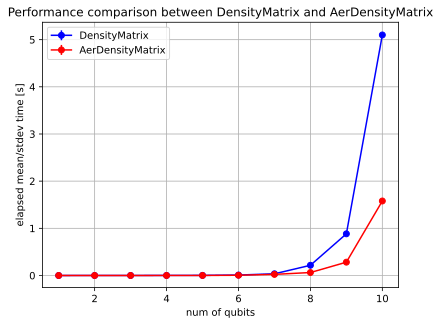

In [18]:
import numpy as np
import matplotlib.pyplot as plt

if isinstance(results_dm, list):
    results_dm = np.array(results_dm)
if isinstance(results_adm, list):
    results_adm = np.array(results_adm)

fig, ax = plt.subplots()
ax.errorbar(x=n_qubits, y=results_dm[:, 0], yerr=results_dm[:, 1], fmt='-o', color='b')
ax.errorbar(x=n_qubits, y=results_adm[:, 0], yerr=results_adm[:, 1], fmt='-o', color='r')
ax.set_xlabel('num of qubits')
ax.set_ylabel('elapsed mean/stdev time [s]')
ax.set_title('Performance comparison between DensityMatrix and AerDensityMatrix')
ax.legend(['DensityMatrix', 'AerDensityMatrix'])
plt.grid()
plt.show()